<a href="https://colab.research.google.com/github/rishinbussa/CS-6120/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [10]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
text2_guesses = [22, 3, 9, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 1, 3, 7, 2, 2, 1, 6, 1, 1, 1, 1, 2, 8, 2, 1, 1, 2, 1, 1, 1, 1, 0]

text3_guesses = [10, 7, 2, 1, 7, 1, 1, 1, 10, 9, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 6, 6, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 3, 4, 2, 3, 1, 1, 1, 5, 3, 1, 1, 1, 2, 1, 3, 1, 6, 3, 1, 1, 2, 4, 1, 1, 0]

text4_guesses = [13, 4, 3, 1, 1, 18, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 8, 8, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 0]

print("Text 2 guesses:", text2_guesses)
print("Text 3 guesses:", text3_guesses)
print("Text 4 guesses:", text4_guesses)

Text 2 guesses: [22, 3, 9, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 1, 3, 7, 2, 2, 1, 6, 1, 1, 1, 1, 2, 8, 2, 1, 1, 2, 1, 1, 1, 1, 0]
Text 3 guesses: [10, 7, 2, 1, 7, 1, 1, 1, 10, 9, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 6, 6, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 3, 4, 2, 3, 1, 1, 1, 5, 3, 1, 1, 1, 2, 1, 3, 1, 6, 3, 1, 1, 2, 4, 1, 1, 0]
Text 4 guesses: [13, 4, 3, 1, 1, 18, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 8, 8, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 0]


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [13]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.

import numpy as np

text2_guesses = [22, 3, 9, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 4, 1, 1, 3, 1, 1, 1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 3, 7, 2, 2, 1, 8, 1, 1, 1, 1, 2, 8, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0]
text3_guesses = [18, 7, 2, 1, 7, 1, 1, 1, 10, 9, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 3, 1, 1, 1, 1, 6, 6, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 3, 4, 2, 3, 1, 1, 1, 5, 3, 1, 1, 1, 2, 1, 3, 1, 6, 3, 1, 1, 2, 4, 1, 1, 0]
text4_guesses = [13, 4, 3, 1, 1, 18, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 8, 8, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 0]

max_length = max(len(text2_guesses), len(text3_guesses), len(text4_guesses))
max_guesses = max(max(text2_guesses), max(text3_guesses), max(text4_guesses))

counts_array = np.zeros((max_length, max_guesses + 1), dtype=int)

for pos, guesses in enumerate(text2_guesses):
    counts_array[pos, guesses] += 1

for pos, guesses in enumerate(text3_guesses):
    counts_array[pos, guesses] += 1

for pos, guesses in enumerate(text4_guesses):
    counts_array[pos, guesses] += 1
print("Counts array (rows=context position, columns=number of guesses):")
print(counts_array)

Counts array (rows=context position, columns=number of guesses):
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [14]:
# TODO: Compute the upper bound for each amount of context N and print it out.

import numpy as np

def compute_entropy(counts):
    total = np.sum(counts)
    if total == 0:
        return 0

    probs = counts / total

    # Calculate entropy: -sum(p * log2(p))
    entropy = 0
    for p in probs:
        if p > 0:  # Handle 0 log 0 = 0
            entropy -= p * np.log2(p)

    return entropy

# Compute upper bound for each context length N
upper_bounds = []
for N in range(len(counts_array)):
    guess_distribution = counts_array[N]

    # Compute the Shannon entropy for this distribution
    F_N = compute_entropy(guess_distribution)
    upper_bounds.append(F_N)

    print(f"F_{N} (upper bound with {N} characters of context): {F_N:.4f} bits")

print("\nSummary of upper bounds for first 10 context positions:")
for N in range(min(10, len(upper_bounds))):
    print(f"Context {N}: {upper_bounds[N]:.4f} bits")

F_0 (upper bound with 0 characters of context): 1.5850 bits
F_1 (upper bound with 1 characters of context): 1.5850 bits
F_2 (upper bound with 2 characters of context): 1.5850 bits
F_3 (upper bound with 3 characters of context): 0.9183 bits
F_4 (upper bound with 4 characters of context): 0.9183 bits
F_5 (upper bound with 5 characters of context): 0.9183 bits
F_6 (upper bound with 6 characters of context): 0.9183 bits
F_7 (upper bound with 7 characters of context): 0.9183 bits
F_8 (upper bound with 8 characters of context): 1.5850 bits
F_9 (upper bound with 9 characters of context): 0.9183 bits
F_10 (upper bound with 10 characters of context): 0.0000 bits
F_11 (upper bound with 11 characters of context): 0.9183 bits
F_12 (upper bound with 12 characters of context): 0.0000 bits
F_13 (upper bound with 13 characters of context): 0.9183 bits
F_14 (upper bound with 14 characters of context): 0.0000 bits
F_15 (upper bound with 15 characters of context): 1.5850 bits
F_16 (upper bound with 16 ch

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [15]:
# TODO: Compute the lower bound for each amount of context N and print it out.

import numpy as np

lower_bounds = []

for N in range(len(counts_array)):
    q = counts_array[N]

    lower_bound = 0
    for i in range(1, 28):
        if i < len(q):
            q_i = q[i]
        else:
            q_i = 0

        if i + 1 < len(q):
            q_i_plus_1 = q[i + 1]
        else:
            q_i_plus_1 = 0

        # Add to sum: (q_i - q_{i+1}) * log2(i)
        if i > 0:  # Avoid log2(0)
            lower_bound += (q_i - q_i_plus_1) * np.log2(i)

    total_samples = np.sum(q)
    if total_samples > 0:
        lower_bound = lower_bound / total_samples

    lower_bounds.append(lower_bound)

    print(f"G_{N} (lower bound with {N} characters of context): {lower_bound:.4f} bits")

print("\nSummary of lower bounds for first 10 context positions:")
for N in range(min(10, len(lower_bounds))):
    print(f"Context {N}: {lower_bounds[N]:.4f} bits")

G_0 (lower bound with 0 characters of context): 0.0884 bits
G_1 (lower bound with 1 characters of context): 0.4075 bits
G_2 (lower bound with 2 characters of context): 0.5850 bits
G_3 (lower bound with 3 characters of context): 0.3333 bits
G_4 (lower bound with 4 characters of context): 0.0741 bits
G_5 (lower bound with 5 characters of context): 0.0275 bits
G_6 (lower bound with 6 characters of context): 0.3333 bits
G_7 (lower bound with 7 characters of context): 0.1950 bits
G_8 (lower bound with 8 characters of context): 0.5223 bits
G_9 (lower bound with 9 characters of context): 0.0566 bits
G_10 (lower bound with 10 characters of context): 0.0000 bits
G_11 (lower bound with 11 characters of context): 0.1950 bits
G_12 (lower bound with 12 characters of context): 0.0000 bits
G_13 (lower bound with 13 characters of context): 0.1383 bits
G_14 (lower bound with 14 characters of context): 0.0000 bits
G_15 (lower bound with 15 characters of context): 0.3023 bits
G_16 (lower bound with 16 ch

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [6]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-17 20:02:08--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz.1’

pg-sample.json.gz.1 100%[===================>] 143.99M   124MB/s    in 1.2s    

2025-09-17 20:02:09 (124 MB/s) - ‘pg-sample.json.gz.1’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [7]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [2]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.

import gzip, json
import re
from collections import Counter

all_tokens = []

with gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        text = rec['text']

        tokens = re.findall(r'[a-z]+', text.lower())

        all_tokens.extend(tokens)

N = len(all_tokens)
print(f"Total number of tokens N: {N}")

Total number of tokens N: 69635098


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [3]:
# TODO: Compute an array of unigrams in descending order of frequency.
# Print the most common word and its frequency.

from collections import Counter

word_counts = Counter(all_tokens)

sorted_words = word_counts.most_common()

most_common_word, most_common_count = sorted_words[0]

print(f"Most common word: '{most_common_word}'")
print(f"Frequency: {most_common_count}")

print(f"\nTop 5 most common words:")
for i, (word, count) in enumerate(sorted_words[:5], 1):
    print(f"{i}. '{word}': {count}")

Most common word: 'the'
Frequency: 4468492

Top 5 most common words:
1. 'the': 4468492
2. 'of': 2486678
3. 'and': 2286006
4. 'to': 1863230
5. 'a': 1438424


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

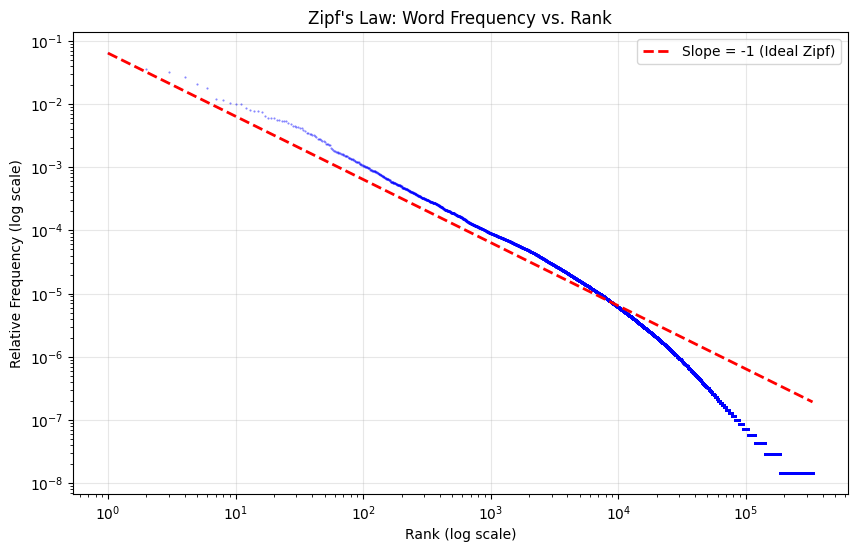

Total unique words (types): 333518
Total tokens: 69635098

Top 10 most frequent words:
Rank 1: 'the' - count: 4468492, relative frequency: 0.064170
Rank 2: 'of' - count: 2486678, relative frequency: 0.035710
Rank 3: 'and' - count: 2286006, relative frequency: 0.032828
Rank 4: 'to' - count: 1863230, relative frequency: 0.026757
Rank 5: 'a' - count: 1438424, relative frequency: 0.020657
Rank 6: 'in' - count: 1256530, relative frequency: 0.018044
Rank 7: 'that' - count: 836580, relative frequency: 0.012014
Rank 8: 'i' - count: 797113, relative frequency: 0.011447
Rank 9: 'he' - count: 735360, relative frequency: 0.010560
Rank 10: 'it' - count: 706278, relative frequency: 0.010143


In [4]:
# TODO: Plot rank vs. relative frequency of unigrams.

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

word_counts = Counter(all_tokens)

sorted_words = word_counts.most_common()

frequencies = [count for word, count in sorted_words]
relative_frequencies = [f/N for f in frequencies]

ranks = range(1, len(frequencies) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, relative_frequencies, 'b.', markersize=1, alpha=0.5)

x_ref = np.array([1, len(ranks)])
y_ref = relative_frequencies[0] * (1/x_ref)
plt.loglog(x_ref, y_ref, 'r--', label='Slope = -1 (Ideal Zipf)', linewidth=2)

plt.xlabel('Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.title("Zipf's Law: Word Frequency vs. Rank")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Total unique words (types): {len(word_counts)}")
print(f"Total tokens: {N}")
print(f"\nTop 10 most frequent words:")
for i, (word, count) in enumerate(sorted_words[:10], 1):
    rel_freq = count/N
    print(f"Rank {i}: '{word}' - count: {count}, relative frequency: {rel_freq:.6f}")

Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

Computing bigrams...
  Processed 0/69635097 tokens
  Processed 10000000/69635097 tokens
  Processed 20000000/69635097 tokens
  Processed 30000000/69635097 tokens
  Processed 40000000/69635097 tokens
  Processed 50000000/69635097 tokens
  Processed 60000000/69635097 tokens
Computing trigrams...
  Processed 0/69635096 tokens
  Processed 10000000/69635096 tokens
  Processed 20000000/69635096 tokens
  Processed 30000000/69635096 tokens
  Processed 40000000/69635096 tokens
  Processed 50000000/69635096 tokens
  Processed 60000000/69635096 tokens

Most common bigram: 'of the' - frequency: 663196
Most common trigram: 'one of the' - frequency: 21817


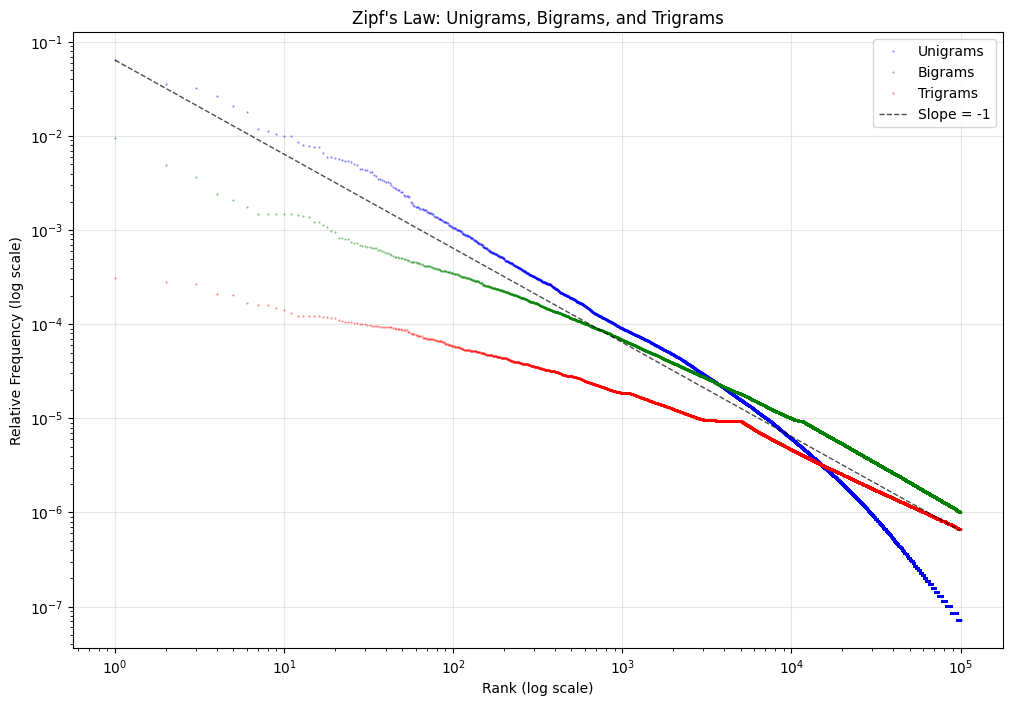

In [5]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

print("Computing bigrams...")
bigram_counts = Counter()

# Processing in chunks to avoid memory issues
chunk_size = 1000000
for i in range(0, len(all_tokens) - 1, chunk_size):
    end = min(i + chunk_size, len(all_tokens) - 1)
    for j in range(i, end):
        bigram = (all_tokens[j], all_tokens[j+1])
        bigram_counts[bigram] += 1
    if i % 10000000 == 0:
        print(f"  Processed {i}/{len(all_tokens)-1} tokens")

print("Computing trigrams...")
trigram_counts = Counter()

for i in range(0, len(all_tokens) - 2, chunk_size):
    end = min(i + chunk_size, len(all_tokens) - 2)
    for j in range(i, end):
        trigram = (all_tokens[j], all_tokens[j+1], all_tokens[j+2])
        trigram_counts[trigram] += 1
    if i % 10000000 == 0:
        print(f"  Processed {i}/{len(all_tokens)-2} tokens")

# Get most common
most_common_bigram = bigram_counts.most_common(1)[0]
most_common_trigram = trigram_counts.most_common(1)[0]

print(f"\nMost common bigram: '{' '.join(most_common_bigram[0])}' - frequency: {most_common_bigram[1]}")
print(f"Most common trigram: '{' '.join(most_common_trigram[0])}' - frequency: {most_common_trigram[1]}")

#using top 100000 to save memory
top_n = 100000
sorted_bigrams = bigram_counts.most_common(top_n)
sorted_trigrams = trigram_counts.most_common(top_n)

bigram_frequencies = [count for _, count in sorted_bigrams]
trigram_frequencies = [count for _, count in sorted_trigrams]

bigram_rel_freq = [f/(N-1) for f in bigram_frequencies]
trigram_rel_freq = [f/(N-2) for f in trigram_frequencies]

bigram_ranks = range(1, len(bigram_frequencies) + 1)
trigram_ranks = range(1, len(trigram_frequencies) + 1)

plt.figure(figsize=(12, 8))

top_unigrams = word_counts.most_common(top_n)
unigram_freqs = [count/N for _, count in top_unigrams]
unigram_ranks = range(1, len(unigram_freqs) + 1)

plt.loglog(unigram_ranks, unigram_freqs, 'b.', markersize=1, alpha=0.5, label='Unigrams')
plt.loglog(bigram_ranks, bigram_rel_freq, 'g.', markersize=1, alpha=0.5, label='Bigrams')
plt.loglog(trigram_ranks, trigram_rel_freq, 'r.', markersize=1, alpha=0.5, label='Trigrams')

x_ref = np.array([1, top_n])
y_ref = unigram_freqs[0] * (1/x_ref)
plt.loglog(x_ref, y_ref, 'k--', label='Slope = -1', linewidth=1, alpha=0.7)

plt.xlabel('Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.title("Zipf's Law: Unigrams, Bigrams, and Trigrams")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.

Looking at the plots,

For unigrams, the distribution fits very closely. On the log-log plot, the points form a fairly straight line, showing that a few words like “the” and “of” occur very often, while most words appear only rarely. This matches what we would expect in natural language, where some core words dominate everyday use.

For bigrams and trigrams, the overall heavy-tailed pattern is still visible, but the plots are less smooth. Because there are so many possible word combinations, the data becomes more spread out and sparse, which causes some bends and deviations from the straight-line shape. Even so, the most common sequences—like “of the” or “in the”—stand out clearly as frequent phrases.

Overall, my impression is that unigrams fit Zipf’s Law very well, while bigrams and trigrams show the same basic pattern but with more variability. These differences reflect how language works: a few words and short phrases occur all the time, while most are much less frequent.